<a href="https://colab.research.google.com/github/Amadou794545/Segmentation-des-donnees-bancaires/blob/main/Segmentation_des_donn%C3%A9es_bancaires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Comprehension du sujet

L'objectif est d'utiliser le clustering (ex : K-Means) pour regrouper les clients d’une banque en différents segments en fonction de leur comportement financier. Cela permet à la banque de mieux comprendre ses clients et d’adapter ses offres (cartes bancaires, crédits, taux d’intérêt, etc.).

#Importation

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler,OneHotEncoder, MinMaxScaler,RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.cluster import KMeans

#Importation dataset

In [66]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("janiobachmann/bank-marketing-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/janiobachmann/bank-marketing-dataset/versions/1


In [67]:
import os
print(os.listdir('/root/.cache/kagglehub/datasets/janiobachmann/bank-marketing-dataset/versions/1'))


['bank.csv']


In [68]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/janiobachmann/bank-marketing-dataset/versions/1/bank.csv')

In [69]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Informations démographiques : âge, emploi, état civil, éducation

Informations financières : défaut, solde, logement, prêt

Détails de la campagne marketing : contact, jour, mois, durée, campagne, pdays (nombre de jours depuis le dernier contact avec le client lors d'une campagne précédente), previous (nombre de contacts avant cette campagne), poutcome (résultat de la campagne marketing précédente)

Variable cible : dépôt

In [70]:
df.dataframeName = 'bank.csv'


#Nettoyage et comprehension du dataset


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [72]:
df.shape

(11162, 17)

In [73]:
df['contact'].value_counts()

,count
contact,
cellular,8042
unknown,2346
telephone,774


In [74]:
df['job'].value_counts()

,count
job,
management,2566
blue-collar,1944
technician,1823
admin.,1334
services,923
retired,778
self-employed,405
student,360
unemployed,357


In [75]:
df['marital'].value_counts()

,count
marital,
married,6351
single,3518
divorced,1293


In [76]:
df['education'].value_counts()

,count
education,
secondary,5476
tertiary,3689
primary,1500
unknown,497


In [77]:
df['poutcome'].value_counts()

,count
poutcome,
unknown,8326
failure,1228
success,1071
other,537


#EDA

In [78]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


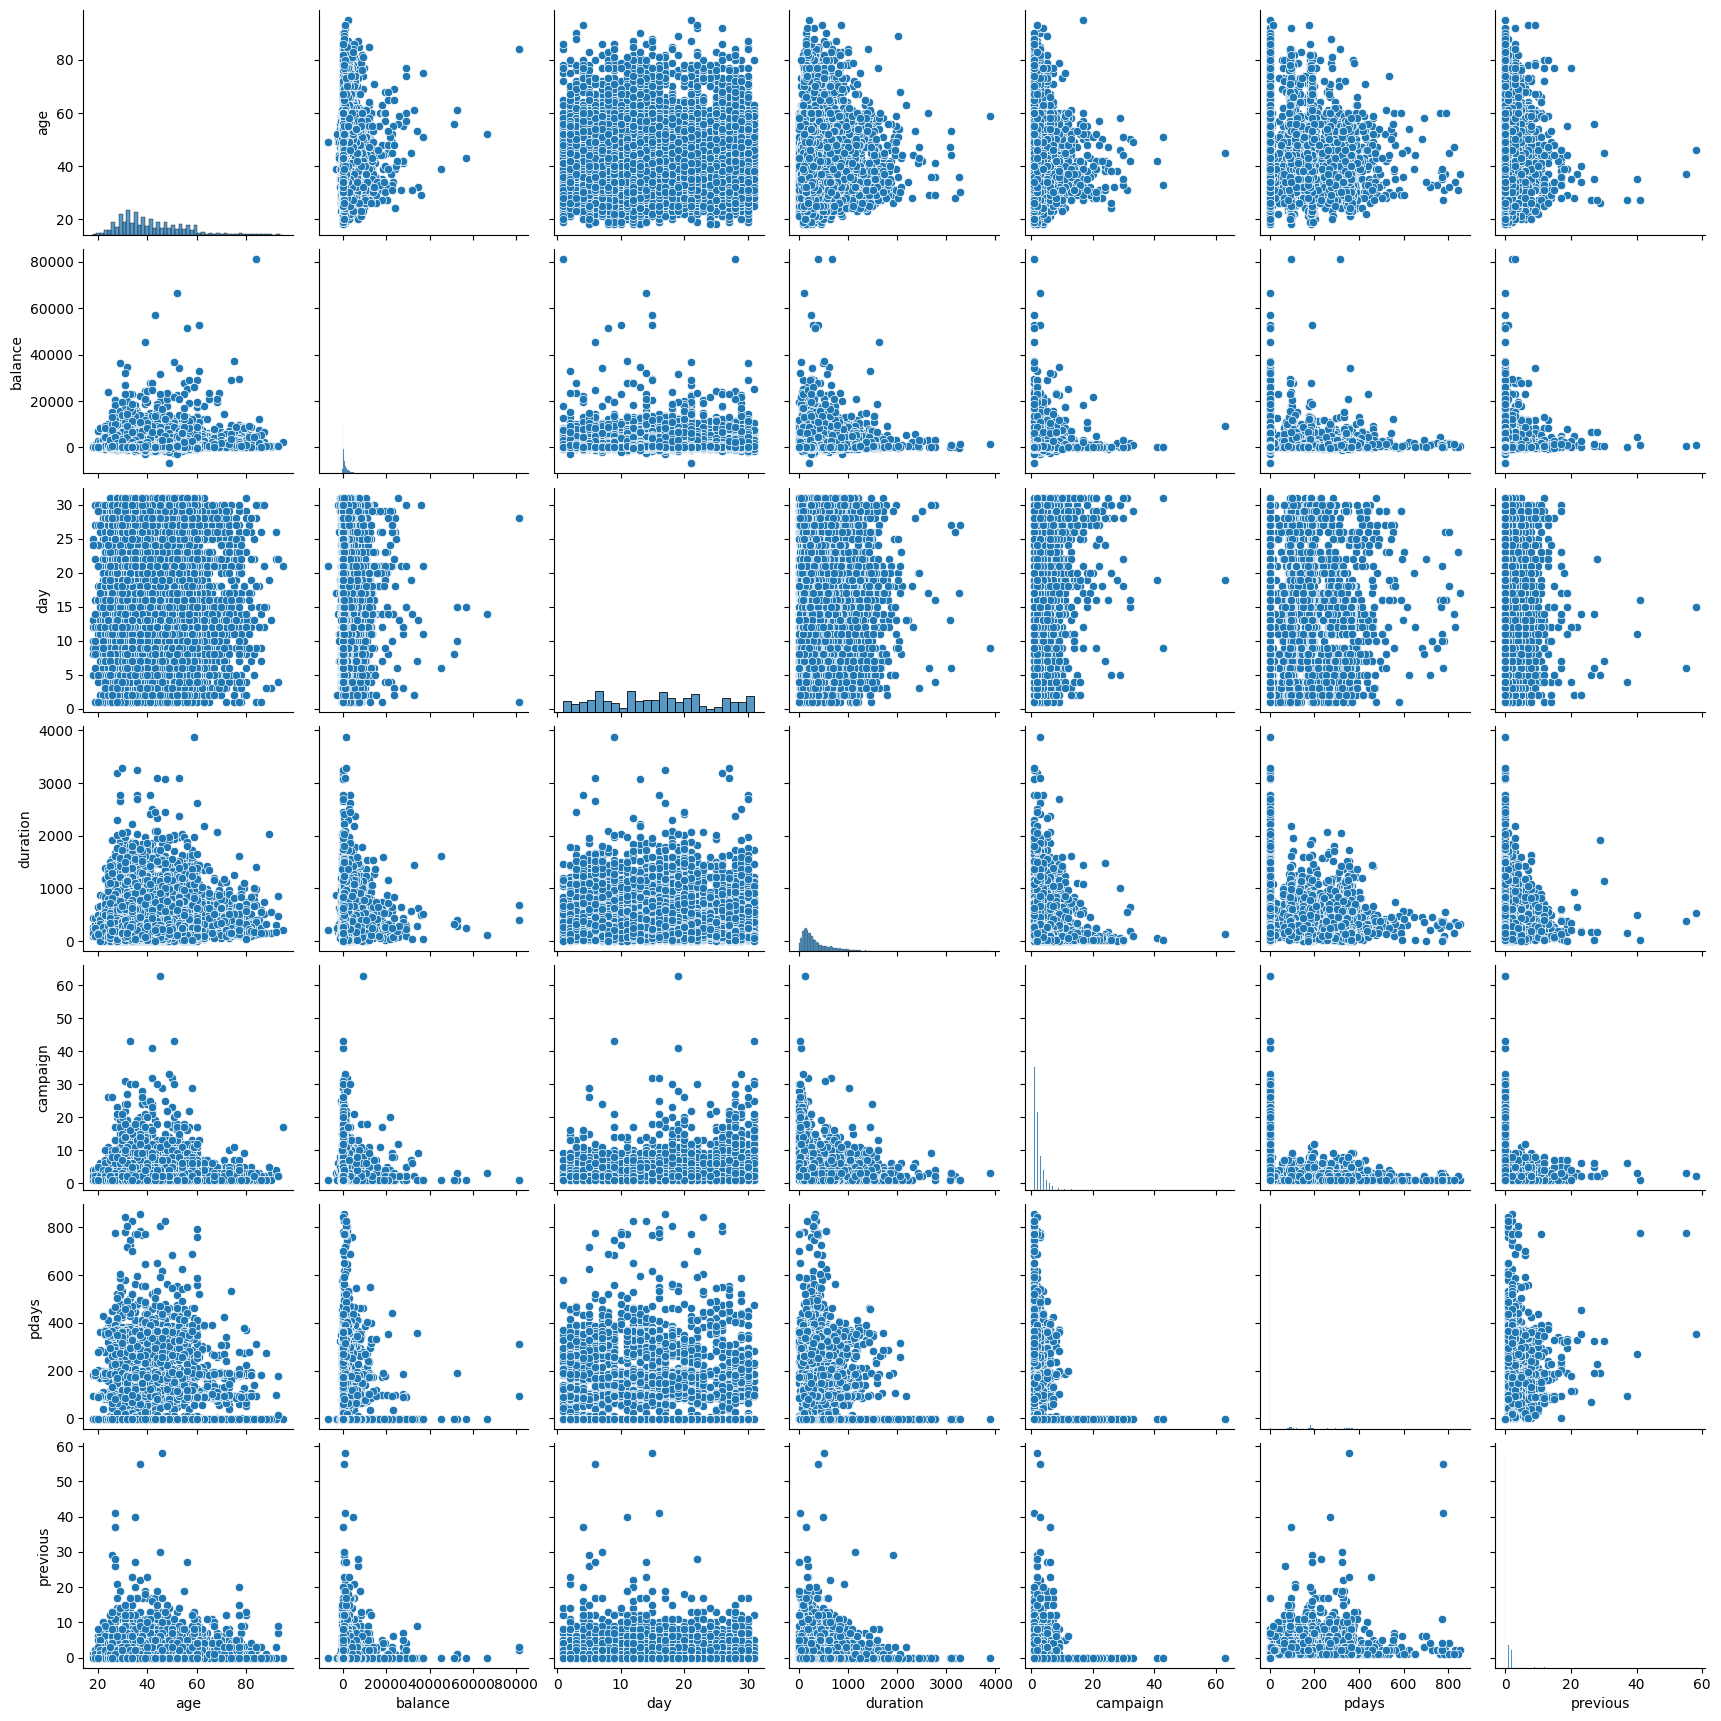

In [79]:
sns.pairplot(df)

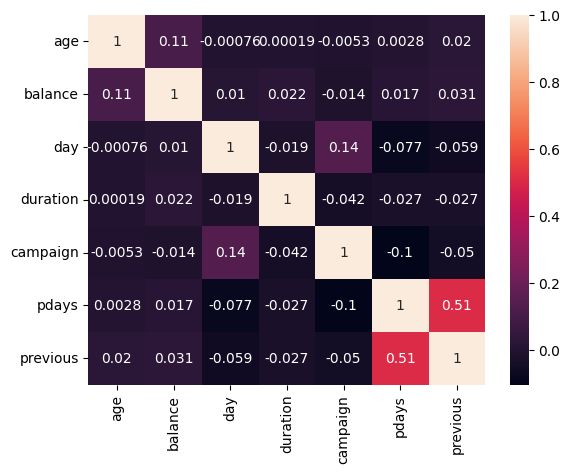

In [80]:
numerical_features = df.select_dtypes(include=np.number).columns
numerical_df = df[numerical_features]

correlation_matrix = numerical_df.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.show()

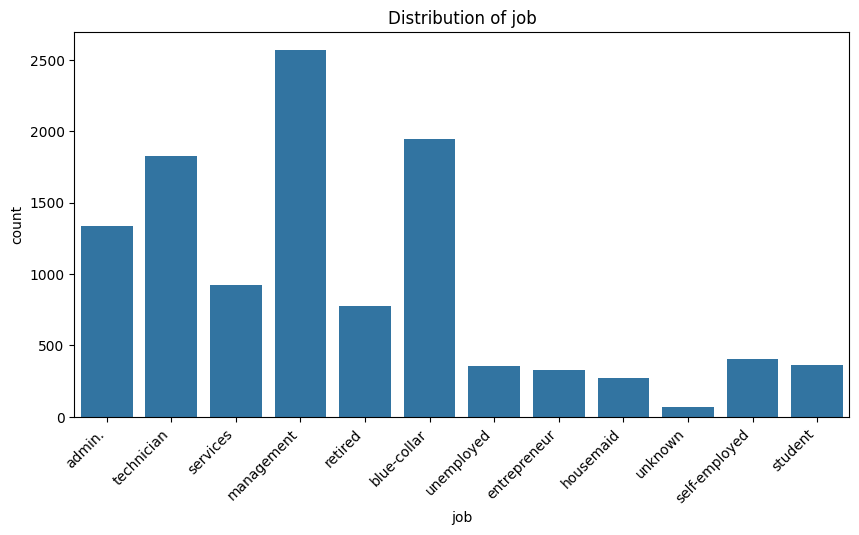

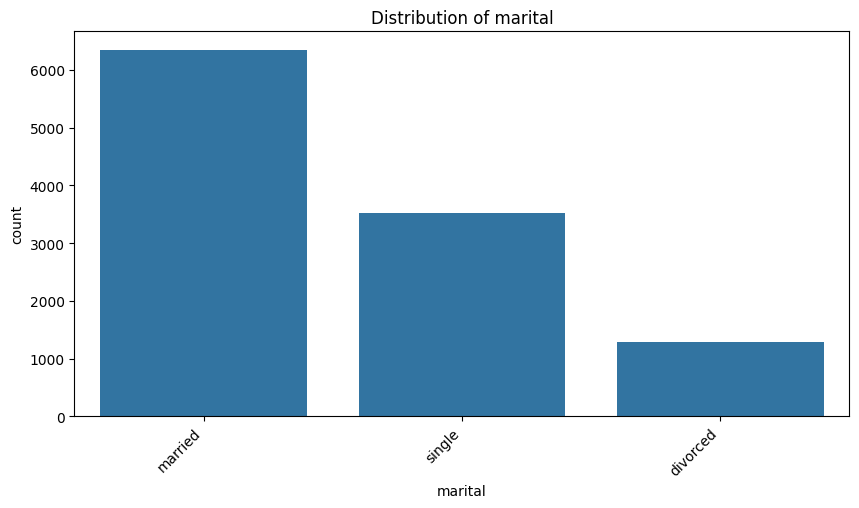

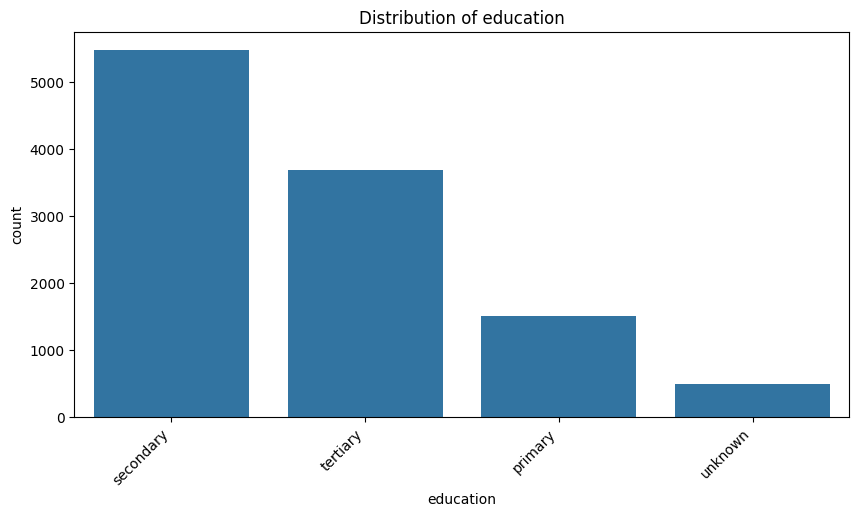

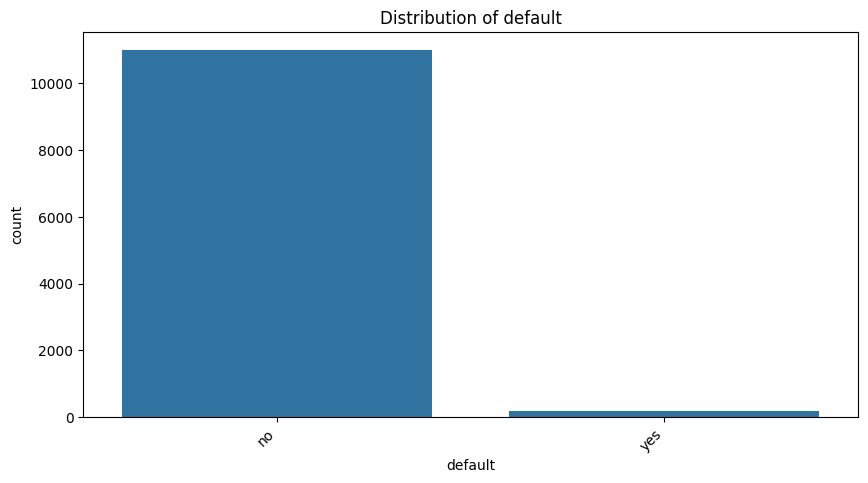

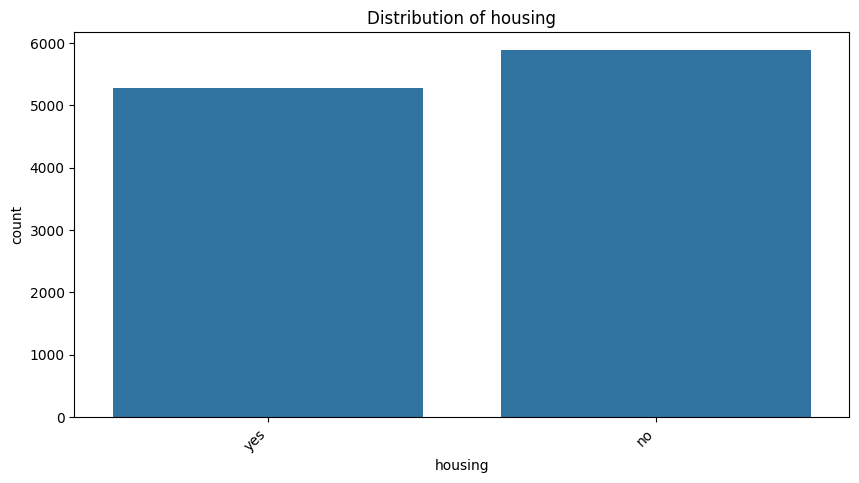

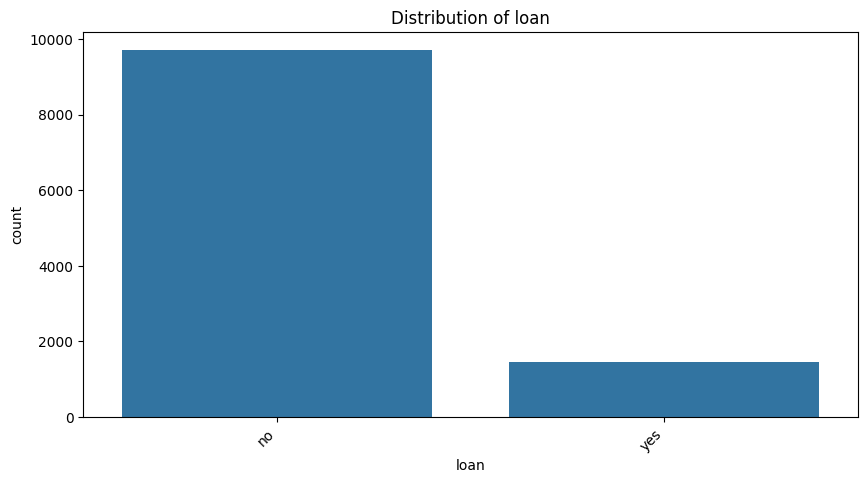

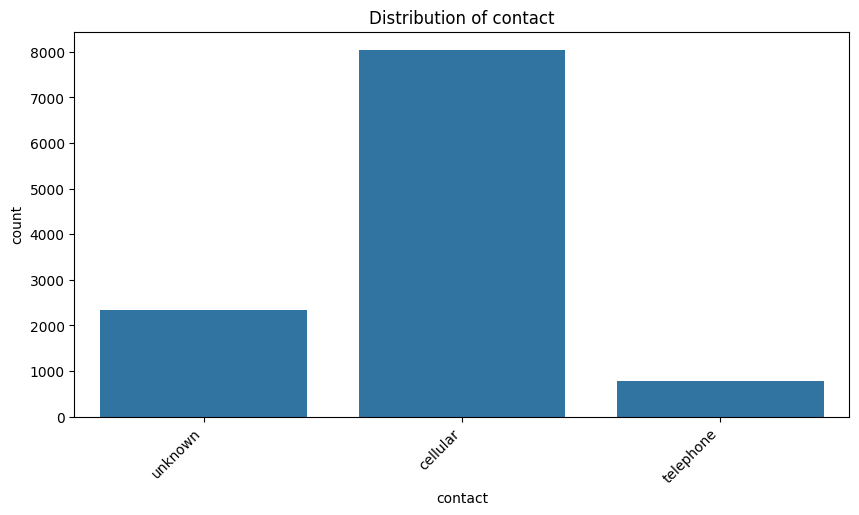

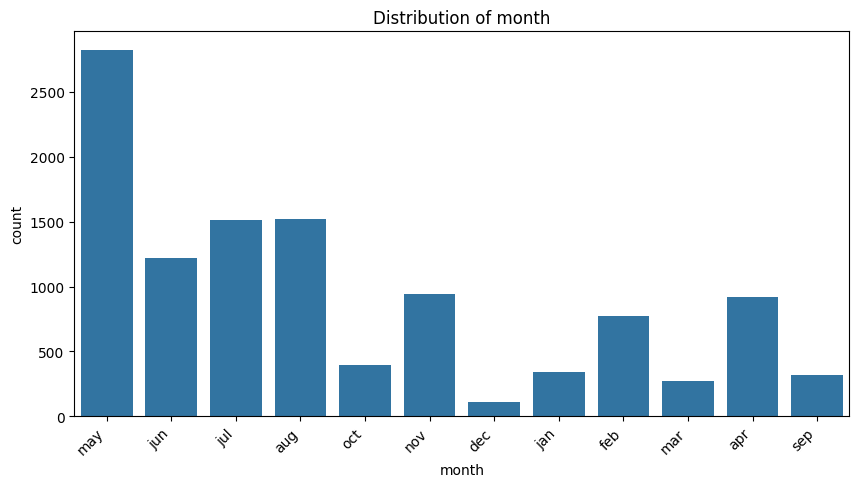

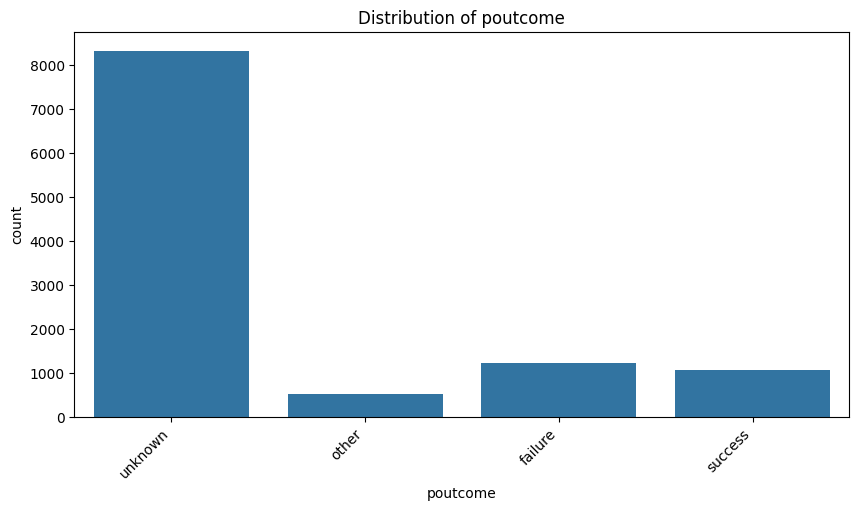

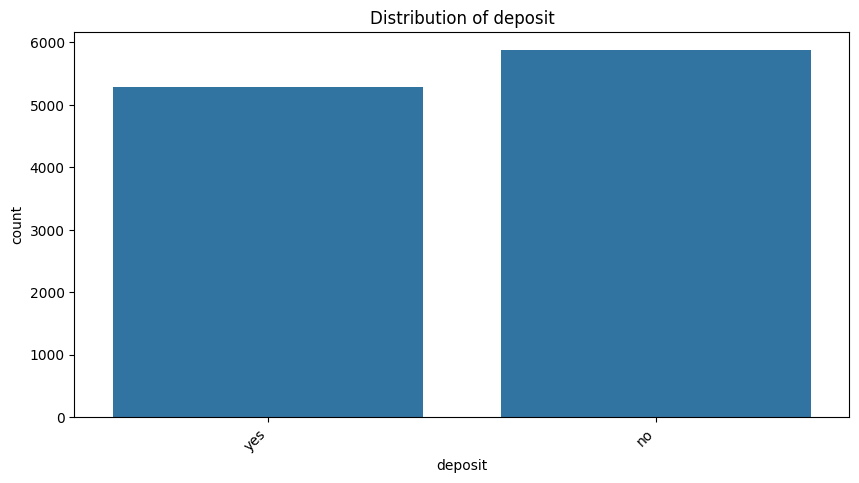

In [81]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

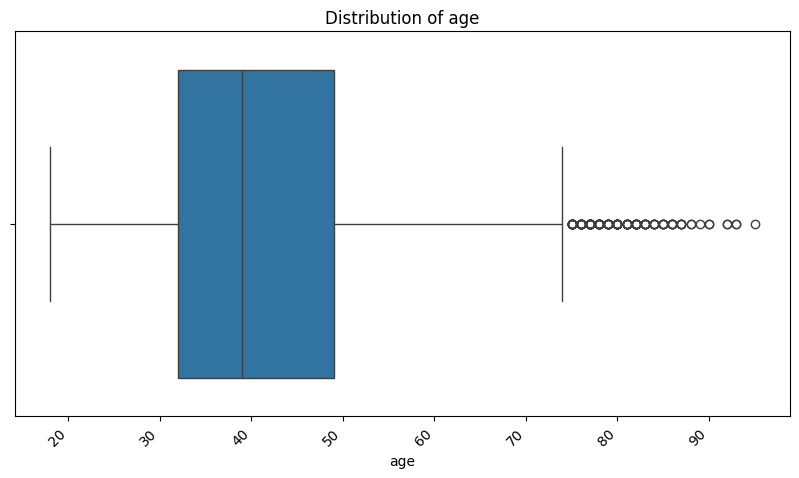

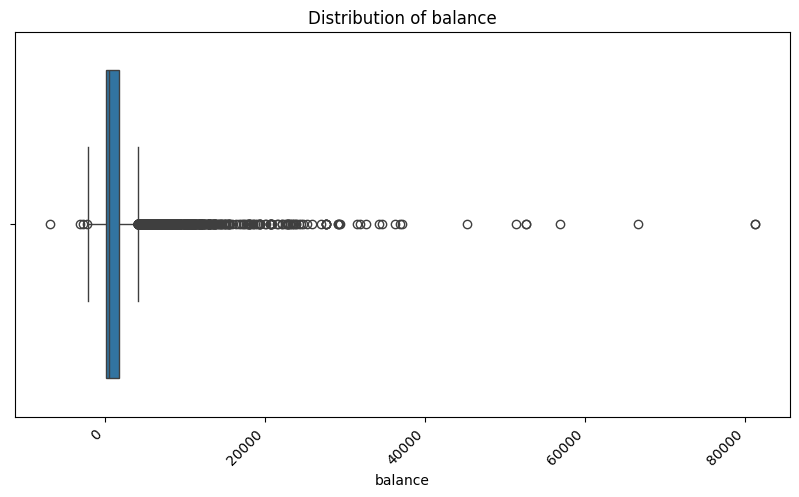

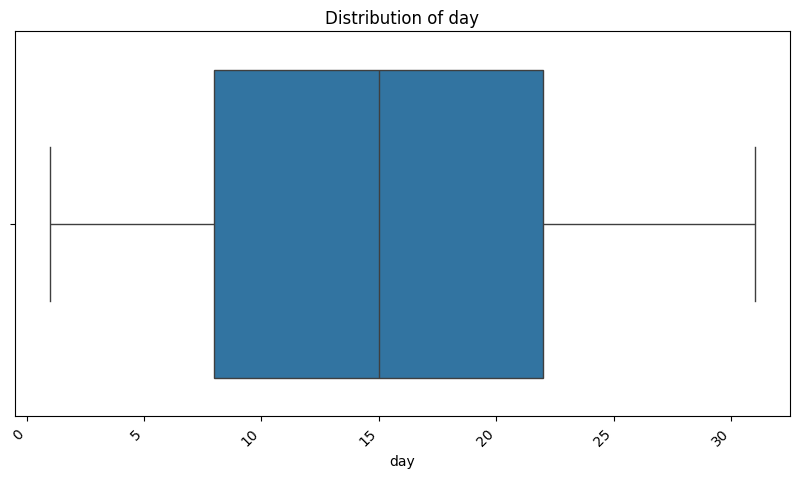

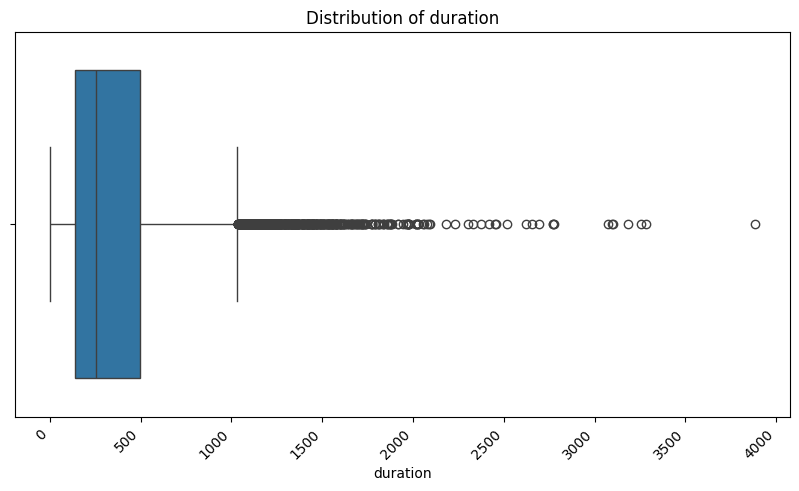

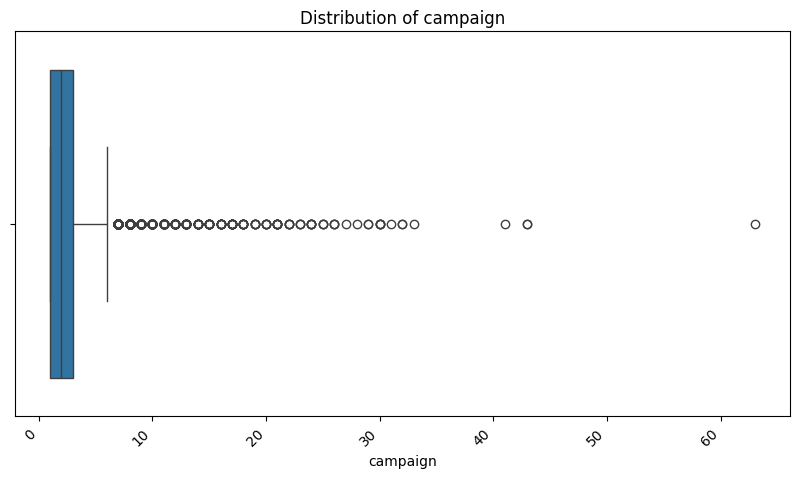

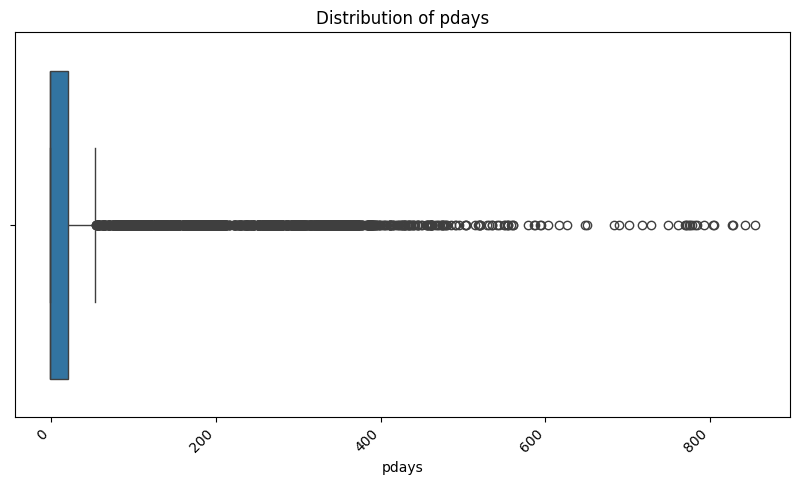

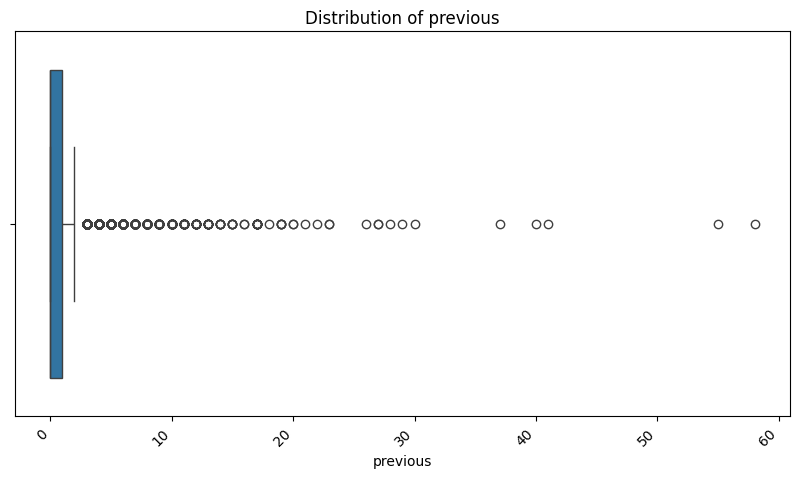

In [82]:
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

**Text de Shapiro-Wilk** pour verifier la normalité des variables

 Interprétation :

* p > 0.05 → On ne rejette pas l’hypothèse de normalité (distribution normale).
* p < 0.05 → Les données ne sont pas normales.


📊 **Analyse de la normalité pour la variable : age**
Statistique de test : 0.9472203150961662, p-valeur : 1.4619542487099597e-52
❌ Les données ne suivent pas une distribution normale (on rejette H0)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11162.
  res = hypotest_fun_out(*samples, **kwds)


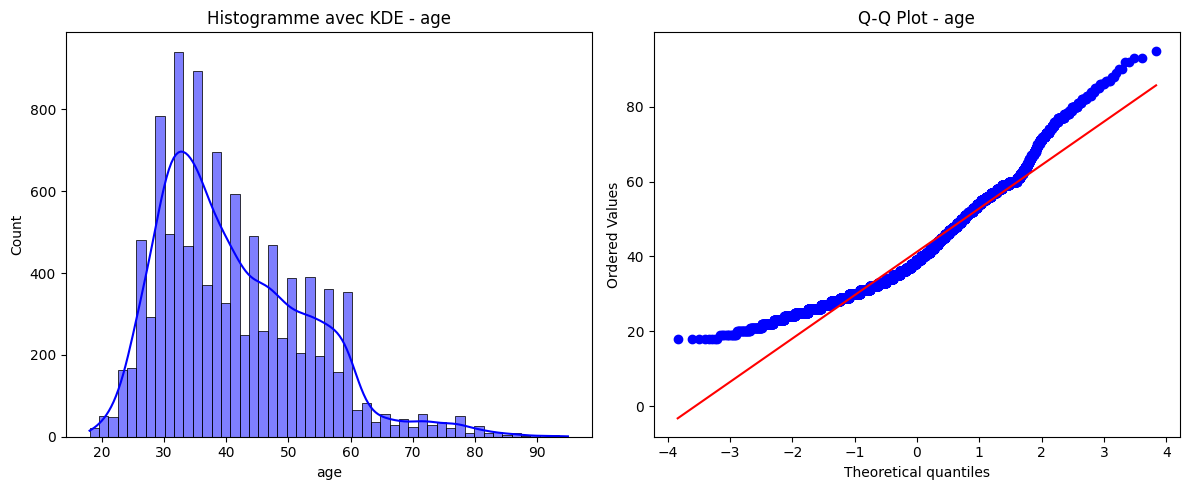


📊 **Analyse de la normalité pour la variable : balance**
Statistique de test : 0.4635691303241063, p-valeur : 2.9431713640543387e-102
❌ Les données ne suivent pas une distribution normale (on rejette H0)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11162.
  res = hypotest_fun_out(*samples, **kwds)


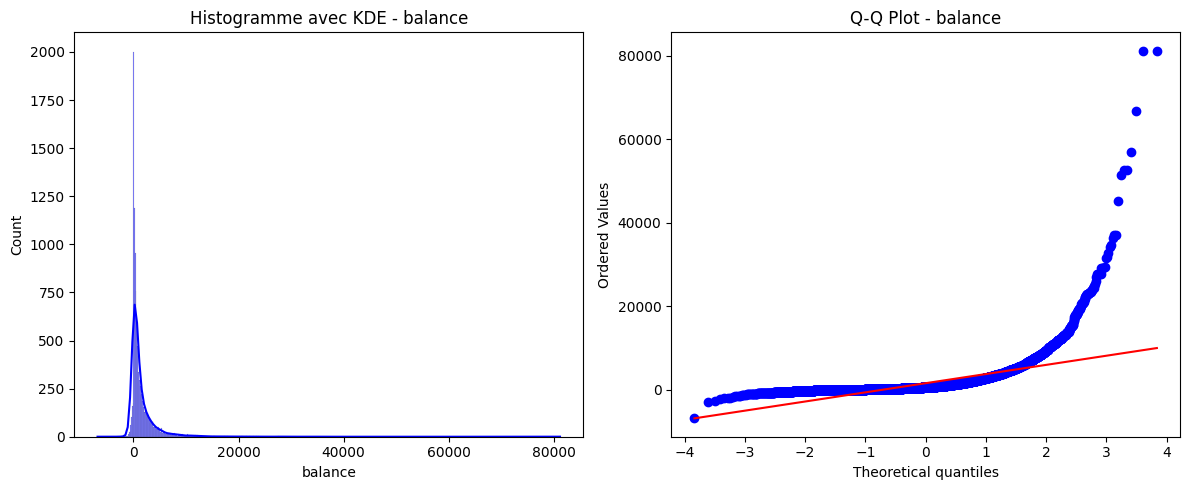


📊 **Analyse de la normalité pour la variable : day**
Statistique de test : 0.9592061148351212, p-valeur : 4.470374855656178e-48
❌ Les données ne suivent pas une distribution normale (on rejette H0)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11162.
  res = hypotest_fun_out(*samples, **kwds)


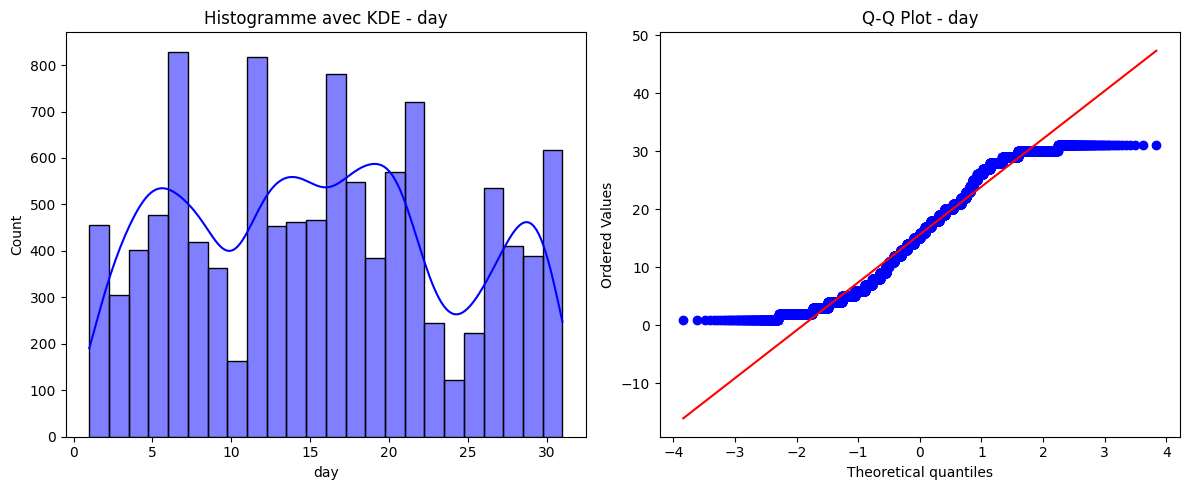


📊 **Analyse de la normalité pour la variable : duration**
Statistique de test : 0.8009227287872124, p-valeur : 5.844677392330821e-79
❌ Les données ne suivent pas une distribution normale (on rejette H0)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11162.
  res = hypotest_fun_out(*samples, **kwds)


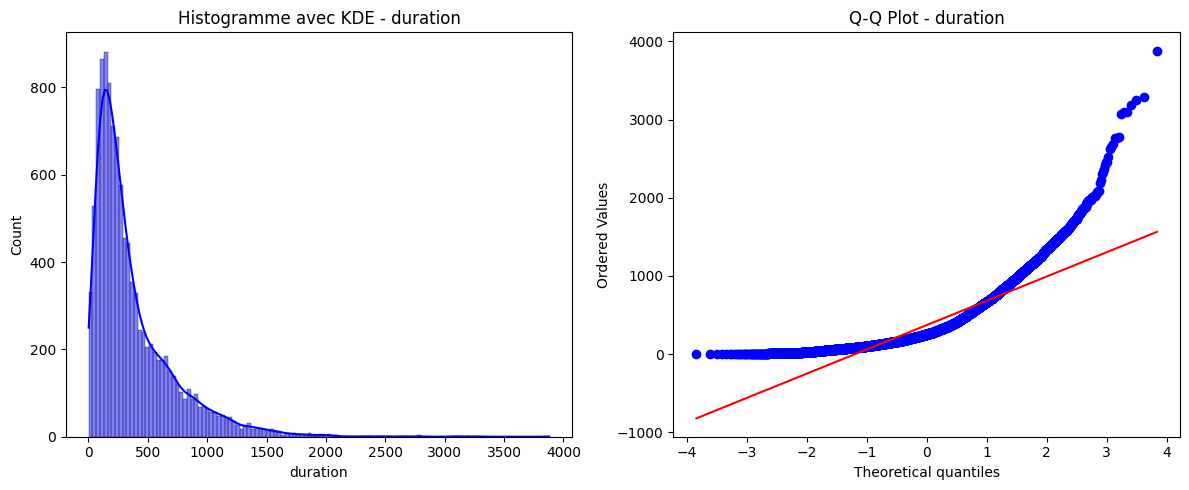


📊 **Analyse de la normalité pour la variable : campaign**
Statistique de test : 0.5385304870909646, p-valeur : 1.6004962410695137e-98
❌ Les données ne suivent pas une distribution normale (on rejette H0)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11162.
  res = hypotest_fun_out(*samples, **kwds)


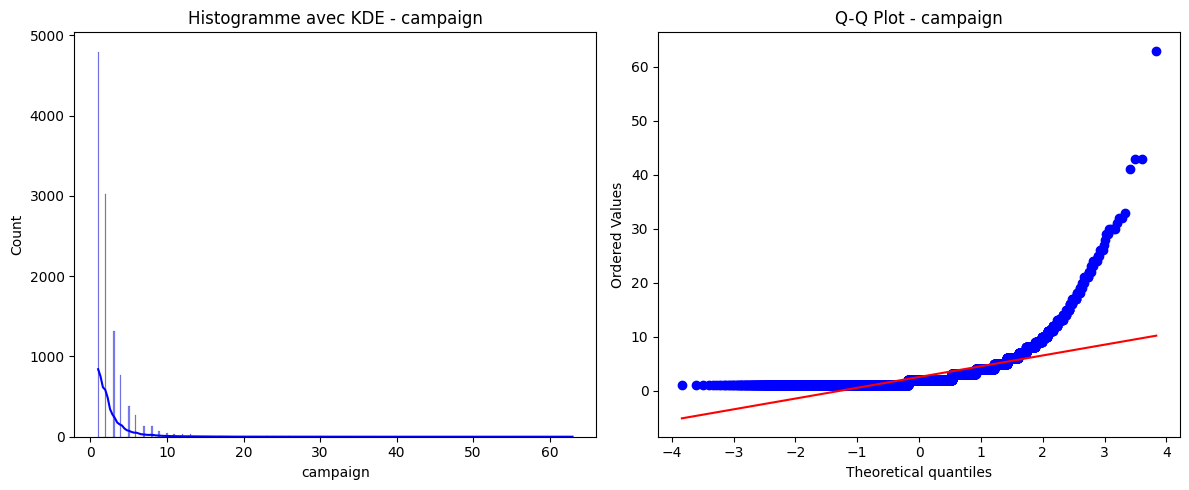


📊 **Analyse de la normalité pour la variable : pdays**
Statistique de test : 0.5560542237830806, p-valeur : 1.424137644947736e-97
❌ Les données ne suivent pas une distribution normale (on rejette H0)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11162.
  res = hypotest_fun_out(*samples, **kwds)


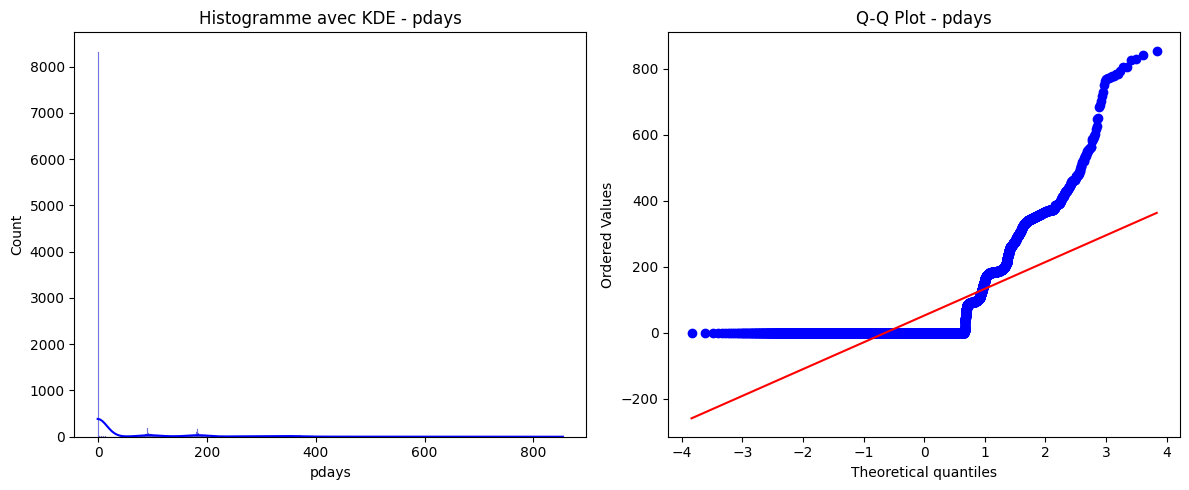


📊 **Analyse de la normalité pour la variable : previous**
Statistique de test : 0.39810802478611873, p-valeur : 3.661388905170451e-105
❌ Les données ne suivent pas une distribution normale (on rejette H0)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11162.
  res = hypotest_fun_out(*samples, **kwds)


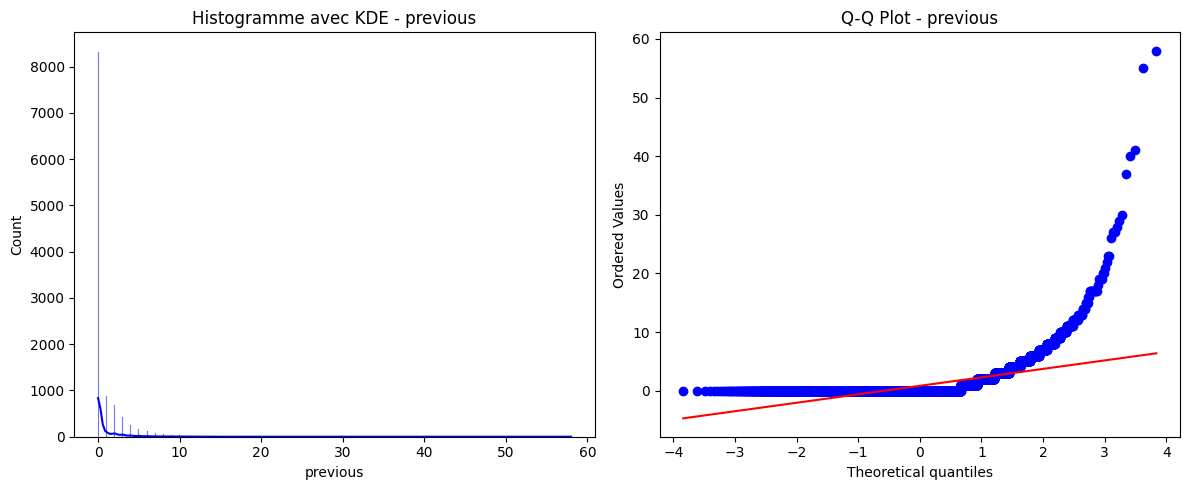

In [83]:
import scipy.stats as stats

numerical_features = df.select_dtypes(include=np.number).columns

for col in numerical_features:
    print(f"\n📊 **Analyse de la normalité pour la variable : {col}**")

    stat, p = shapiro(df[col])
    print(f"Statistique de test : {stat}, p-valeur : {p}")

    if p > 0.05:
        print("✅ Les données suivent une distribution normale (on ne rejette pas H0)")
    else:
        print("❌ Les données ne suivent pas une distribution normale (on rejette H0)")

    # 📊 Affichage des graphiques
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histogramme avec courbe de densité
    sns.histplot(df[col], kde=True, ax=axes[0], color='blue')
    axes[0].set_title(f"Histogramme avec KDE - {col}")

    # Q-Q Plot
    stats.probplot(df[col], dist="norm", plot=axes[1])
    axes[1].set_title(f"Q-Q Plot - {col}")

    plt.tight_layout()
    plt.show()


les données qui ne suivent pas une distribution normale on doit alors faire une standardisation ou une normalisation

In [84]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       11162 non-null  int64
 1   balance   11162 non-null  int64
 2   day       11162 non-null  int64
 3   duration  11162 non-null  int64
 4   campaign  11162 non-null  int64
 5   pdays     11162 non-null  int64
 6   previous  11162 non-null  int64
dtypes: int64(7)
memory usage: 610.6 KB


#Preprocessing

Encodage du dataset

In [85]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [90]:
categorical_columns = ['poutcome', 'month', 'contact', 'housing']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(df[categorical_columns])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

Standardisation

In [91]:
numerical_columns = ['duration', 'balance', 'pdays', 'age']
scaler = RobustScaler()
scaled_numerical = scaler.fit_transform(df[numerical_columns])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [92]:
processed_data = pd.concat([scaled_numerical_df, encoded_categorical_df], axis=1)


In [93]:
processed_data.head()

,duration,balance,pdays,age,poutcome_other,poutcome_success,poutcome_unknown,month_aug,month_dec,month_feb,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,contact_telephone,contact_unknown,housing_yes
0,2.198324,1.130517,0.0,1.176471,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,3.385475,-0.318411,0.0,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.167598,0.453972,0.0,0.117647,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.905028,1.214376,0.0,0.941176,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.167598,-0.230769,0.0,0.882353,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#Clustering

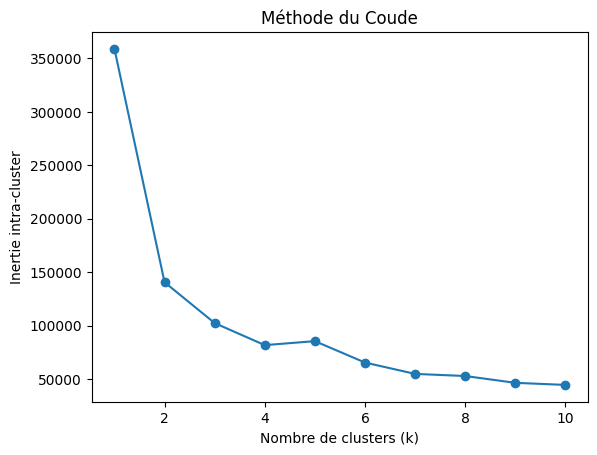

In [95]:
# Supposons que "X" soit notre dataset avec les features
inerties = []
K_range = range(1, 11)  # Tester k de 1 à 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(processed_data)
    inerties.append(kmeans.inertia_)  # Inertie intra-cluster

# Tracer la courbe
plt.plot(K_range, inerties, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie intra-cluster")
plt.title("Méthode du Coude")
plt.show()

In [96]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(processed_data)

In [97]:
for i in range(k):
    print(f"Cluster {i}:")
    print(df[df['Cluster'] == i].describe())
    print("\n")

Cluster 0:
               age       balance          day     duration     campaign  \
count  8451.000000   8451.000000  8451.000000  8451.000000  8451.000000   
mean     41.054668   1441.123181    16.028281   380.078334     2.702994   
std      11.565787   3039.216706     8.465805   365.354866     3.011743   
min      18.000000  -6847.000000     1.000000     2.000000     1.000000   
25%      32.000000     96.000000     8.000000   131.000000     1.000000   
50%      39.000000    500.000000    16.000000   250.000000     2.000000   
75%      49.000000   1588.000000    22.000000   524.000000     3.000000   
max      95.000000  66653.000000    31.000000  3881.000000    63.000000   

             pdays     previous  Cluster  
count  8451.000000  8451.000000   8451.0  
mean     -0.471424     0.054195      0.0  
std       5.146652     0.564552      0.0  
min      -1.000000     0.000000      0.0  
25%      -1.000000     0.000000      0.0  
50%      -1.000000     0.000000      0.0  
75%      -1.

In [99]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(processed_data, df['Cluster'])
print(f"The average silhouette score is: {silhouette_avg}")

The average silhouette score is: 0.5690601372629022


Cluster 0 : Clients peu engagés, contactés pour la première fois
* Ils ont rarement été contactés avant (pdays ≈ -1 et previous ≈ 0).
* Leur solde est très dispersé, allant du découvert (-6847) à 66653.
* Durée des appels la plus longue (380 sec) → Peut-être parce qu'ils découvrent l’offre ?
* Hypothèse : Ce sont peut-être des clients nouveaux ou peu actifs, qu’on essaie d’attirer.

Cluster 1 : Clients réactivés après un long moment
* Ils ont déjà été contactés avant (previous ≈ 3.12, pdays ≈ 354 jours).
* Leur solde bancaire est similaire à celui du Cluster 0.
* Ils ont reçu en moyenne moins de contacts (1.97).
* Hypothèse : Ce sont des clients plus anciens, mais qu'on a recontactés après un long délai.

 Cluster 2 : Clients plus actifs et à meilleur solde
Meilleur solde bancaire moyen (1996).
* Durée d’appel légèrement plus courte (337 sec), signe qu’ils connaissent peut-être déjà les services.
* Ils ont été contactés plus récemment (pdays ≈ 143 jours).
* Hypothèse : Ce sont des clients déjà engagés, avec une relation plus stable avec la banque.